<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.526996,92.262442,61.000046,-11838.213856,-11625.424372,552.098253,-12177.522625
1,0.0,1.0,35.190013,23.167090,35.108912,-50.826235,52.639780,595.040986,-542.401206
2,0.0,2.0,29.123050,40.513250,57.969149,-440.985921,-303.380472,611.638803,-915.019275
3,0.0,3.0,58.578305,72.400357,33.311912,2399.330141,2573.620714,510.688233,2062.932481
4,0.0,4.0,22.345245,94.014339,62.212728,-9301.078786,-9112.506475,998.631144,-10111.137618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.795809,70.201540,60.111039,-6113.683746,-5895.575357,-1248.245863,-4647.329494
119996,999.0,116.0,43.338982,35.810036,36.056652,759.033487,884.239157,-577.980266,1462.219423
119997,999.0,117.0,46.851836,25.318072,32.325757,618.129471,732.625136,-706.783901,1439.409037
119998,999.0,118.0,98.283786,72.201261,84.794389,5152.529711,5417.809147,-982.702814,6400.511961


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.526996,92.262442,61.000046,-11838.213856,-11625.424372,552.098253,-12177.522625
1,0.0,1.0,35.190013,23.167090,35.108912,-50.826235,52.639780,595.040986,-542.401206
2,0.0,2.0,29.123050,40.513250,57.969149,-440.985921,-303.380472,611.638803,-915.019275
3,0.0,3.0,58.578305,72.400357,33.311912,2399.330141,2573.620714,510.688233,2062.932481
4,0.0,4.0,22.345245,94.014339,62.212728,-9301.078786,-9112.506475,998.631144,-10111.137618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.795809,70.201540,60.111039,-6113.683746,-5895.575357,-1248.245863,-4647.329494
119996,999.0,116.0,43.338982,35.810036,36.056652,759.033487,884.239157,-577.980266,1462.219423
119997,999.0,117.0,46.851836,25.318072,32.325757,618.129471,732.625136,-706.783901,1439.409037
119998,999.0,118.0,98.283786,72.201261,84.794389,5152.529711,5417.809147,-982.702814,6400.511961


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    49.526996  92.262442  ...   552.098253 -12177.522625
      1.0    35.190013  23.167090  ...   595.040986   -542.401206
      2.0    29.123050  40.513250  ...   611.638803   -915.019275
      3.0    58.578305  72.400357  ...   510.688233   2062.932481
      4.0    22.345245  94.014339  ...   998.631144 -10111.137618
...                ...        ...  ...          ...           ...
999.0 115.0  77.795809  70.201540  ... -1248.245863  -4647.329494
      116.0  43.338982  35.810036  ...  -577.980266   1462.219423
      117.0  46.851836  25.318072  ...  -706.783901   1439.409037
      118.0  98.283786  72.201261  ...  -982.702814   6400.511961
      119.0  70.253884  83.953509  ...   -40.214889  17090.803076

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    49.526996  92.262442  ...   552.098253 -12177.522625
      1.0    35.190013  23.167090  ...   595.040986   -542.401206
      2.0    29.123050  40.513250  ...   611.638803   -915.019275
      3.0    58.578305  72.400357  ...   510.688233   2062.932481
      4.0    22.345245  94.014339  ...   998.631144 -10111.137618
...                ...        ...  ...          ...           ...
999.0 115.0  77.795809  70.201540  ... -1248.245863  -4647.329494
      116.0  43.338982  35.810036  ...  -577.980266   1462.219423
      117.0  46.851836  25.318072  ...  -706.783901   1439.409037
      118.0  98.283786  72.201261  ...  -982.702814   6400.511961
      119.0  70.253884  83.953509  ...   -40.214889  17090.803076

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.526996,92.262442,61.000046,-11838.213856,-11625.424372,552.098253,-12177.522625
1,0.0,1.0,35.190013,23.167090,35.108912,-50.826235,52.639780,595.040986,-542.401206
2,0.0,2.0,29.123050,40.513250,57.969149,-440.985921,-303.380472,611.638803,-915.019275
3,0.0,3.0,58.578305,72.400357,33.311912,2399.330141,2573.620714,510.688233,2062.932481
4,0.0,4.0,22.345245,94.014339,62.212728,-9301.078786,-9112.506475,998.631144,-10111.137618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.795809,70.201540,60.111039,-6113.683746,-5895.575357,-1248.245863,-4647.329494
119996,999.0,116.0,43.338982,35.810036,36.056652,759.033487,884.239157,-577.980266,1462.219423
119997,999.0,117.0,46.851836,25.318072,32.325757,618.129471,732.625136,-706.783901,1439.409037
119998,999.0,118.0,98.283786,72.201261,84.794389,5152.529711,5417.809147,-982.702814,6400.511961


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    49.526996  92.262442  ...   552.098253 -12177.522625
      1.0    35.190013  23.167090  ...   595.040986   -542.401206
      2.0    29.123050  40.513250  ...   611.638803   -915.019275
      3.0    58.578305  72.400357  ...   510.688233   2062.932481
      4.0    22.345245  94.014339  ...   998.631144 -10111.137618
...                ...        ...  ...          ...           ...
999.0 115.0  77.795809  70.201540  ... -1248.245863  -4647.329494
      116.0  43.338982  35.810036  ...  -577.980266   1462.219423
      117.0  46.851836  25.318072  ...  -706.783901   1439.409037
      118.0  98.283786  72.201261  ...  -982.702814   6400.511961
      119.0  70.253884  83.953509  ...   -40.214889  17090.803076

[120000 rows x 7 columns]

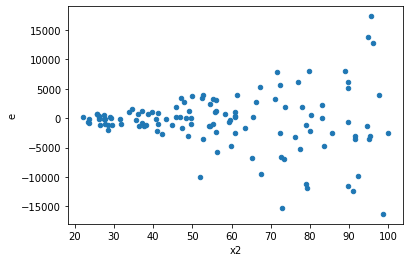

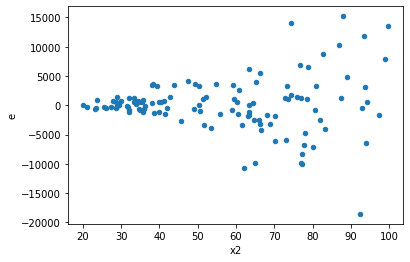

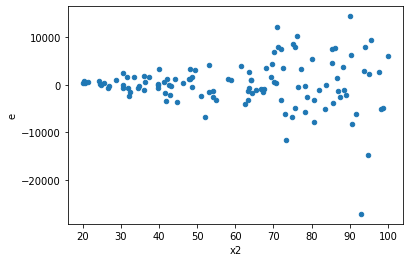

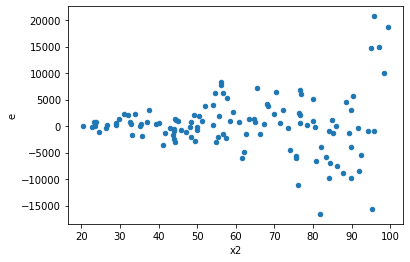

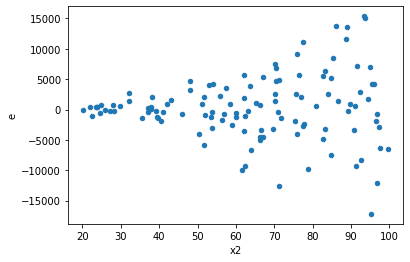

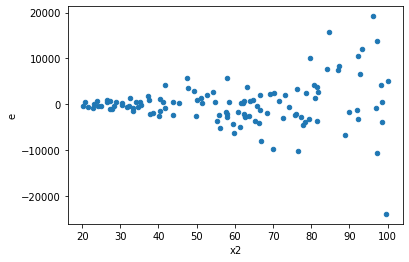

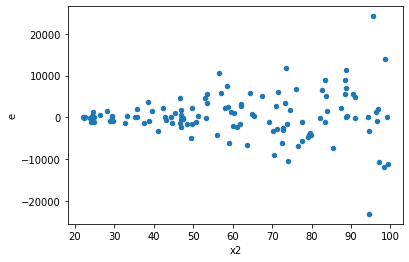

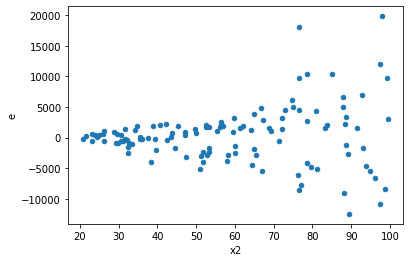

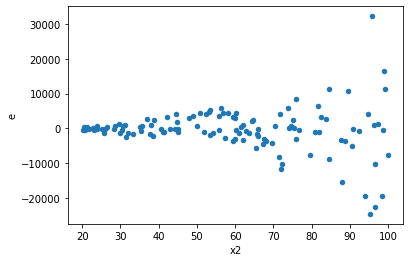

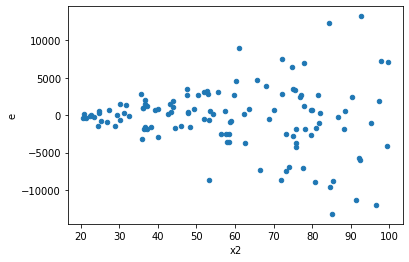

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,925867927.8289931,1499812497.0158691,20574842.840644293,33329166.60035265,1.61989896391884,0.10931510795823995,0.94534244602088,0.05465755397911998,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,165962400.810989,2682813804.6257467,3688053.351355311,59618084.54723882,16.165190377555128,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,249823506.17492336,2572300115.5964904,5551633.470553853,57162224.79103312,10.296469515544295,1.2667644710973036e-12,0.9999999999993666,6.333822355486518e-13,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,560510091.9246707,987107966.4109442,12455779.820548238,21935732.58690987,1.7610886594769926,0.060741199924140066,0.96962940003793,0.030370599962070033,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,458264762.1778196,1083066250.590663,10183661.381729325,24068138.902014732,2.363407226520294,0.004703494799629615,0.9976482526001852,0.0023517473998148075,Reject005=0 : Heteroscedasticity
11.0,45.0,45.0,166475083.15060192,1332374257.0349798,3699446.2922355984,29608316.822999552,8.003445511600349,1.2527467951883864e-10,0.9999999999373627,6.263733975941932e-11,Reject005=0 : Heteroscedasticity
12.0,45.0,45.0,953773223.3276997,1445271293.097115,21194960.518393327,32117139.846602555,1.5153196354732903,0.1671507508813368,0.9164246245593316,0.0835753754406684,Reject005=1 : Homoscedasticity
13.0,45.0,45.0,520062500.264603,2099317120.8041184,11556944.450324511,46651491.57342485,4.0366631313274945,7.297091434210756e-06,0.9999963514542829,3.648545717105378e-06,Reject005=0 : Heteroscedasticity
14.0,45.0,45.0,1015527390.4651889,1393309161.859726,22567275.343670864,30962425.81910502,1.3720054967906719,0.2924495193137402,0.8537752403431299,0.1462247596568701,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,925867927.8289931,1499812497.0158691,20574842.840644293,33329166.60035265,1.61989896391884,0.10931510795823995,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1336025857.9565895,944227088.9473383,29689463.51014643,20982824.19882974,0.706743124262209,0.2481520518105061,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,165962400.810989,2682813804.6257467,3688053.351355311,59618084.54723882,16.165190377555128,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1367967521.2593808,428668854.276925,30399278.250208464,9525974.539487222,0.3133618654061926,0.00016322037021965512,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,249823506.17492336,2572300115.5964904,5551633.470553853,57162224.79103312,10.296469515544295,1.2667644710973036e-12,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2080496565.8541584,183529448.3931535,46233257.0189813,4078432.186514522,0.08821425202295613,2.0640741312310737e-13,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2976600655.2615843,167417552.85087687,66146681.228035204,3720390.063352819,0.056244546125104634,2.973575342148447e-17,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,560510091.9246707,987107966.4109442,12455779.820548238,21935732.58690987,1.7610886594769926,0.060741199924140066,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,458264762.1778196,1083066250.590663,10183661.381729325,24068138.902014732,2.363407226520294,0.004703494799629615,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    722
Reject005=1 : Homoscedasticity      278
Name: Result_test, dtype: int64